In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading the data
salaries1=pd.read_csv('Salary_Data.csv')

In [3]:
## chaking the data size
salaries1.shape

(30, 2)

In [4]:
## chaking the datatypes & null values
salaries1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [5]:
## chaking overall data type
salaries1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
salaries1.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


C:\Users\Aniket Mali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


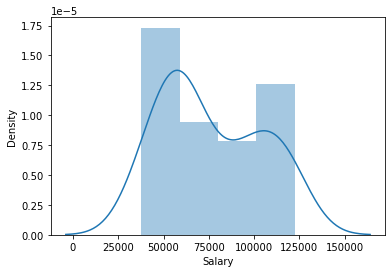

In [7]:
## chaking the distribution of the salary by using histogram
sns.distplot(salaries1['Salary'])
plt.show()

C:\Users\Aniket Mali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


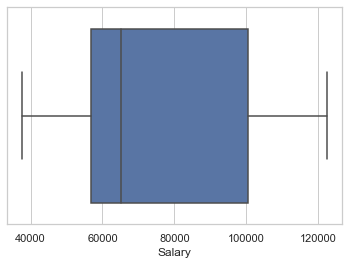

In [8]:
sns.set_theme(style="whitegrid")
sns.boxplot(salaries1['Salary'])
plt.show()
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [9]:
## log transformation as our targrt is not uniform
salaries2=np.log(salaries1['Salary'])

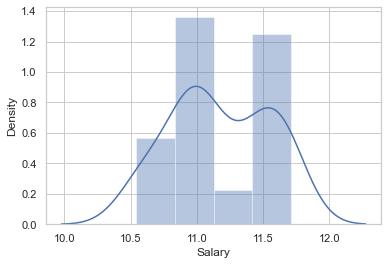

In [10]:
## chaking histogram of transformed data
sns.distplot(salaries2)
plt.show()

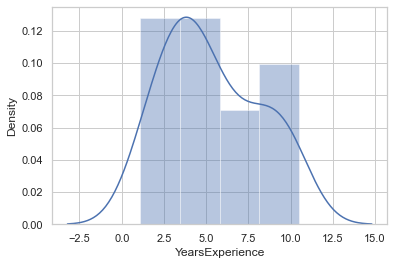

In [11]:
## chaking distribution of the feature
sns.distplot(salaries1['YearsExperience'])
plt.show()

In [12]:
## all looks like good so building the model
import statsmodels.api as sms

In [13]:
# Following the regression equation, our dependent variable (y) is the salary
y = salaries2
# Similarly, our independent variable (x) is the Experience
x1 = salaries1 ['YearsExperience']

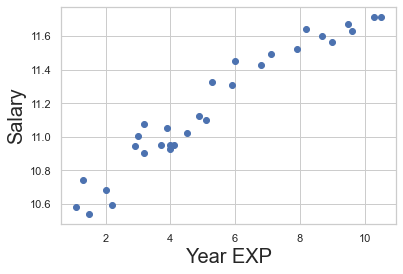

In [14]:
# Plot a scatter plot (first we put the horizontal axis, then the vertical axis)
plt.scatter(x1,y)
# Name the axes
plt.xlabel('Year EXP', fontsize = 20)
plt.ylabel('Salary', fontsize = 20)
# Show the plot
plt.show()

In [15]:
## adding constant
sms.add_constant(x1)

,const,YearsExperience
0,1.0,1.1
1,1.0,1.3
2,1.0,1.5
3,1.0,2.0
4,1.0,2.2
5,1.0,2.9
6,1.0,3.0
7,1.0,3.2
8,1.0,3.2
9,1.0,3.7


In [16]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sms.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sms.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           7.03e-18
Time:                        14:21:17   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## From above table R2 is good and also very less diffrence in R2 & adj R
## so this shows our model is good

In [17]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


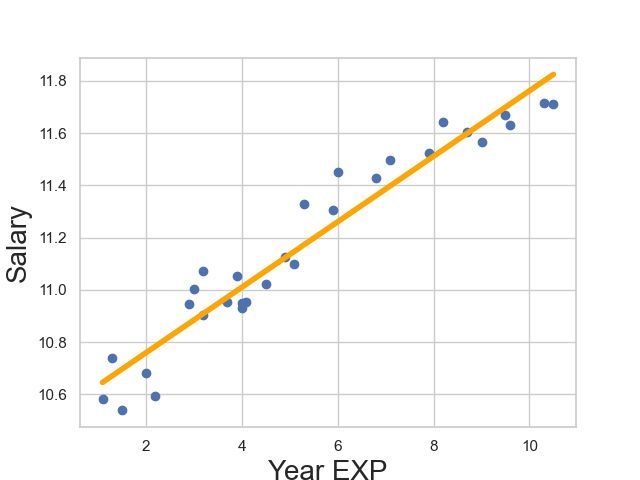

In [18]:
# Create a scatter plot
plt.scatter(x1,y)
# Define the regression equation, so we can plot it later
yhat = 0.1255*x1+10.5074
# Plot the regression line against the independent variable (Year EXP)
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
# Label the axes
plt.xlabel('Year EXP', fontsize = 20)
plt.ylabel('Salary', fontsize = 20)
plt.show()

In [19]:
yhat

0     10.64545
1     10.67055
2     10.69565
3     10.75840
4     10.78350
5     10.87135
6     10.88390
7     10.90900
8     10.90900
9     10.97175
10    10.99685
11    11.00940
12    11.00940
13    11.02195
14    11.07215
15    11.12235
16    11.14745
17    11.17255
18    11.24785
19    11.26040
20    11.36080
21    11.39845
22    11.49885
23    11.53650
24    11.59925
25    11.63690
26    11.69965
27    11.71220
28    11.80005
29    11.82515
Name: YearsExperience, dtype: float64

In [20]:
## converting yhat into exponential
y_pred=np.exp(yhat)

In [21]:
y_pred

0      42001.054328
1      43068.622727
2      44163.326214
3      47023.370416
4      48218.594324
5      52646.234735
6      53311.108336
7      54666.151811
8      54666.151811
9      58206.365466
10     59685.834908
11     60439.612195
12     60439.612195
13     61202.908997
14     64353.718699
15     67666.736407
16     69386.666314
17     71150.312810
18     76714.805499
19     77683.643047
20     85888.051456
21     89183.381932
22     98602.313125
23    102385.461094
24    109016.006603
25    113198.704462
26    120529.522270
27    122051.699458
28    133259.015730
29    136646.147705
Name: YearsExperience, dtype: float64